In [1]:
using PyPlot, PyCall, Polynomials
@pyimport scipy.special as scipy_special
include("../src/misc/expint.jl")

INFO: Loading help data...


expint (generic function with 1 method)

### Signal-to-noise ratios to plot

In [2]:
SNRs_dB = -10:30
SNRs = 10.^(SNRs_dB/10)
longterm_rates_scipy = (1/log(2))*exp(1./SNRs + log(scipy_special.exp1(1./SNRs)))
longterm_rates_matlab = zeros(longterm_rates_scipy)
for i = 1:length(longterm_rates_scipy)
    longterm_rates_matlab[i] = (1/log(2))*exp(1/SNRs[i] + log(expint(1/SNRs[i])))
end
longterm_rates_upper_bound = log2(1 + SNRs)
longterm_rates_lower_bound = 0.5*log2(1 + 2*SNRs);

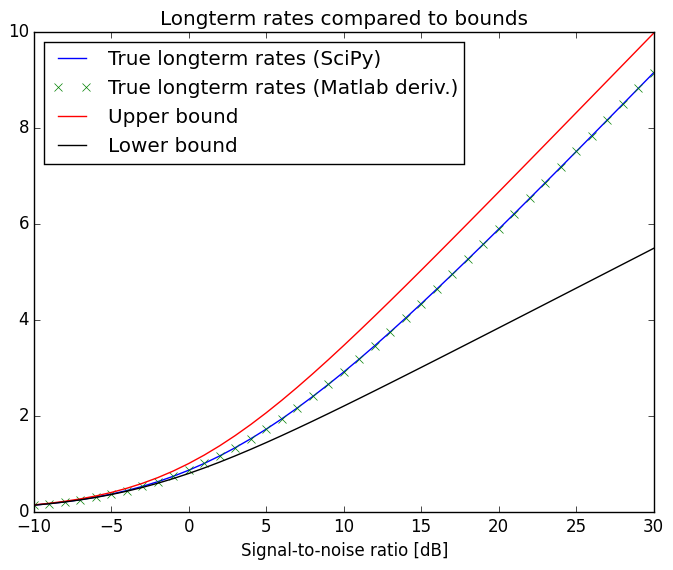

PyObject <matplotlib.legend.Legend object at 0x1157fc690>

In [3]:
plot(SNRs_dB, longterm_rates_scipy, "b", label="True longterm rates (SciPy)")
plot(SNRs_dB, longterm_rates_matlab, "gx", label="True longterm rates (Matlab deriv.)")
plot(SNRs_dB, longterm_rates_upper_bound, "r", label="Upper bound")
plot(SNRs_dB, longterm_rates_lower_bound, "k", label="Lower bound")
title("Longterm rates compared to bounds")
xlabel("Signal-to-noise ratio [dB]")
legend(loc="best")